# Additional Features Calculations

## Goal
**A. Calculate following features:**  
1. Proximity to 90th percentile Zip Code
2. Average of surrounding Zip Codes Income
3. Average of surrounding Zip Codes House Price

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [151]:
# Load data
income = pd.read_csv("Income_Home_Prices_ZIP.csv")

In [152]:
# Datafram columns name
income.columns

Index(['ZIP', 'Borough', 'Neighborhood', 'Year',
       'Total Adjusted Gross Income (IRS)', 'Number of Returns (IRS)', 'AGI',
       'Median HH Income ($)', 'Mean HH Income ($)',
       'Median Home Value ($/sq. foot)', '% Employed', '% Unemployed',
       '% Not in Labor Force', 'Bordering Water',
       'Number of Subway Stations in ZIP', 'Stops in ZIP',
       'Number of Subway Lines Serving ZIP', 'Lines Serving ZIP',
       'Number of Parks', 'Number of Playgrounds', 'Park Acreage',
       'LandSqMile', 'Latitude', 'Longitude', 'adjacentZIP', 'Zillow_value',
       'Zillow_value2', 'Coffees', 'NewCoffees'],
      dtype='object')

In [153]:
# Create Dataframe per year

income2001 = income[income.Year == 2001]
income2002 = income[income.Year == 2002]
income2003 = income[income.Year == 2003]  # note: no data for year 2003
income2004 = income[income.Year == 2004]
income2005 = income[income.Year == 2005]
income2006 = income[income.Year == 2006]
income2007 = income[income.Year == 2007]
income2008 = income[income.Year == 2008]
income2009 = income[income.Year == 2009]
income2010 = income[income.Year == 2010]
income2011 = income[income.Year == 2011]
income2012 = income[income.Year == 2012]
income2013 = income[income.Year == 2013]
income2014 = income[income.Year == 2014]
income2015 = income[income.Year == 2015]

## 1. Inflation Adjusted Mean Income (2001 dollars)

|Year|	Average |	CPI |  
|----|----------|-------|
|2001|     177.1|	2.8 |
|2002|	179.9|	1.6|  
|2003|	184|	2.3|  
|2004|	188.9|	2.7|  
|2005|	195.3|	3.4|  
|2006|	201.6|	3.2|  
|2007|	207.3|	2.8|  
|2008|	215.303|	3.8|  
|2009|	214.537|	-0.4  
|2010|	218.056|	1.6|  
|2011|	224.939|	3.2|  
|2012|	229.594|	2.1|  
|2013|	232.957|	1.5|  
|2014|	236.736|	1.6|  
|2015|	237.017|	0.1|  
|2016|	240.007|	1.3|  

CPI column: increase % from previous year. Eg: 1.3% increase from 2015 to 2016  

In [115]:
# Inflation measured by CPI
# Link: http://www.usinflationcalculator.com/inflation/consumer-price-index-and-annual-percent-changes-from-1913-to-2008/

# CPI from 2002 to 2015
CPI = [0.016, 0.023, 0.027, 0.034, 0.032, 0.028, 0.038, -0.004, 0.016, 0.032, 0.021, 0.015, 0.016, 0.001]
CPI_adj = []

for i in range(len(CPI)):
    product = 1.0
    for x in CPI[i:]:
        product *= (1+x)
    CPI_adj.append(product)
    
    #adj = CPI_adj[i] * (1+CPI[i])
    #CPI_adj.append(adj)
CPI_adj.append(1.0)

In [116]:
print(CPI_adj)

[1.337774159674108, 1.3167068500729404, 1.2871034702570292, 1.2532653069688697, 1.2120554226004543, 1.1744723087213702, 1.1424827905849906, 1.1006577943978713, 1.1050781068251723, 1.0876753019932797, 1.0539489360399996, 1.0322712399999998, 1.017016, 1.001, 1.0]


In [119]:
# AGIDisc = AGI in 2015 dollars

income_dfs = [income2001, income2002, income2003, income2004, income2005, income2006, income2007, income2008,
              income2009, income2010, income2011, income2012, income2013, income2014, income2015]

for i in range(len(income_dfs)):
    income_dfs[i]['AGIDisc'] = income_dfs[i]['AGI'].values * CPI_adj[i]

/Applications/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [120]:
income2015['AGIDisc'].describe()

count       175.000000
mean     100608.382857
std      121690.168565
min       25370.000000
25%       40190.500000
50%       53305.000000
75%       81776.000000
max      614330.000000
Name: AGIDisc, dtype: float64

In [8]:
income2015['AGI'].describe()

count       175.000000
mean     100608.382857
std      121690.168565
min       25370.000000
25%       40190.500000
50%       53305.000000
75%       81776.000000
max      614330.000000
Name: AGI, dtype: float64

In [156]:
income2001['Zillow_value2']

0       0.0
14      0.0
28      0.0
42      0.0
56      0.0
70      0.0
84      0.0
98      0.0
112     0.0
126     0.0
140     0.0
154     0.0
168     0.0
182     0.0
196     0.0
210     0.0
224     0.0
238     0.0
252     0.0
266     0.0
280     0.0
294     0.0
308     0.0
322     0.0
336     0.0
350     0.0
364     0.0
378     0.0
392     0.0
406     0.0
       ... 
2030    0.0
2044    0.0
2058    0.0
2072    0.0
2086    0.0
2100    0.0
2114    0.0
2128    0.0
2142    0.0
2156    0.0
2170    0.0
2184    0.0
2198    0.0
2212    0.0
2226    0.0
2240    0.0
2254    0.0
2268    0.0
2282    0.0
2296    0.0
2310    0.0
2324    0.0
2338    0.0
2352    0.0
2367    0.0
2380    0.0
2394    0.0
2408    0.0
2422    0.0
2436    0.0
Name: Zillow_value2, dtype: float64

In [157]:
# Zillow_value = original data (cover from 2001 to 2015 with some missing data)
# Zillow_value2 = adjusted data to estimate missing data. ONLY COVER FROM 2005 TO 2015

# ZillowAdj = Zillow_value in 2015 dollars
# ZillowAdj2 = Zillow_value2 in 2015 dollars

income_dfs = [income2001, income2002, income2003, income2004, income2005, income2006, income2007, income2008,
              income2009, income2010, income2011, income2012, income2013, income2014, income2015]

for i in range(len(income_dfs)):
    income_dfs[i]['ZillowAdj'] = income_dfs[i]['Zillow_value'].values * CPI_adj[i]
    income_dfs[i]['ZillowAdj2'] = income_dfs[i]['Zillow_value2'].values * CPI_adj[i]  # all 0 before 2005

/Applications/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Applications/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## 2. Neighboring Zip Code Income Average 

In [121]:
for df in income_dfs:
    
    def neighbor_avg(zips):
        zips_list = [int(z) for z in zips.split(",")]
        total = 0
        n = 0
        
        for zz in zips_list:
            try:
                neighbor = df[df.ZIP == zz]['AGIDisc'].tolist()[0]
                total += neighbor
                n += 1
                #print(zz)
                #print(total)
                #print(n)
                
            except:
                pass

        avg = round(total/n,2)

        return avg

    # Calculate average of adjacent areas income
    df['AdjacentIncome'] = df['adjacentZIP'].map(neighbor_avg)
    

/Applications/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [122]:
income2008[['AdjacentIncome', 'adjacentZIP']].head(1)

,AdjacentIncome,adjacentZIP
6,249423.64,"10018, 10016, 10010, 10011"


In [123]:
# Check results
testzips = [10018, 10016, 10010, 10011]
count = len(testzips)
total = 0

for t in testzips:
    add = income2008[income2008.ZIP == t].AGIDisc.tolist()[0]
    print(t,":",add)
    total += add

print("Average of surrounding zip codes income:", total/count)

10018 : 414376.747093
10016 : 189566.291929
10010 : 198421.083885
10011 : 195330.436798
Average of surrounding zip codes income: 249423.639926


## 3. Neighboring Zip Code House Price Average

In [158]:
for df in income_dfs:
    
    def neighbor_avg(zips):
        zips_list = [int(z) for z in zips.split(",")]
        total = 0
        n = 0
        
        for zz in zips_list:
            try:
                neighbor = df[df.ZIP == zz]['ZillowAdj2'].tolist()[0]
                total += neighbor
                n += 1
                #print(zz)
                #print(total)
                #print(n)
                
            except:
                pass

        avg = round(total/n,2)

        return avg

    # Calculate average of adjacent areas income
    df['AdjacentZillow2'] = df['adjacentZIP'].map(neighbor_avg)

/Applications/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [159]:
income2008[['AdjacentZillow2', 'adjacentZIP']].head(1)

,AdjacentZillow2,adjacentZIP
6,0.83,"10018, 10016, 10010, 10011"


In [160]:
# Check results
testzips = [10018, 10016, 10010, 10011]
count = len(testzips)
total = 0

for t in testzips:
    add = income2008[income2008.ZIP == t].ZillowAdj2.tolist()[0]
    print(t,":",add)
    total += add

print("Average of surrounding zip codes income:", total/count)

10018 : 0.747419360655
10016 : 0.898010452042
10010 : 0.854761591
10011 : 0.814738292375
Average of surrounding zip codes income: 0.828732424018


## 4. Proximity Calculation

In [124]:
income90perc = []

for df in income_dfs:
    top90 = df.AGIDisc.quantile(0.9)
    income90perc.append(top90)
    
print(income90perc)

[223976.83868343747, 188551.63090633502, nan, 171588.56362609021, 190120.34706717753, 200656.24500042864, 227037.83608997922, 198218.56285090704, 178108.09066446935, 196961.46452639264, 208592.93604571815, 215243.62470010392, 234282.85680799978, 242805.56299999988, 248172.59999999998]


In [125]:
zips90th = []
i = 0
for df in income_dfs:
    zips = df[df.AGIDisc >= income90perc[i]].ZIP.tolist()
    zips90th.append(zips)
    i += 1
    
year = 2001
for i in range(15):
    print(year+i)
    print(zips90th[i])
    print("")

2001
[10004, 10005, 10006, 10007, 10017, 10018, 10019, 10021, 10022, 10023, 10024, 10028, 10036, 10065, 10075, 10128, 10280, 11005]

2002
[10004, 10005, 10006, 10007, 10016, 10017, 10018, 10019, 10021, 10022, 10023, 10024, 10028, 10036, 10065, 10075, 10128, 11005]

2003
[]

2004
[10004, 10005, 10006, 10007, 10013, 10017, 10018, 10019, 10021, 10022, 10023, 10024, 10028, 10036, 10065, 10075, 10128, 11005]

2005
[10004, 10005, 10006, 10007, 10013, 10017, 10018, 10019, 10021, 10022, 10023, 10024, 10028, 10036, 10065, 10075, 10128, 11005]

2006
[10004, 10005, 10007, 10013, 10014, 10016, 10017, 10018, 10019, 10021, 10022, 10023, 10024, 10028, 10036, 10065, 10075, 10128]

2007
[10004, 10005, 10007, 10013, 10014, 10016, 10017, 10018, 10019, 10021, 10022, 10023, 10024, 10028, 10036, 10065, 10075, 10128]

2008
[10003, 10004, 10005, 10007, 10010, 10013, 10014, 10017, 10018, 10019, 10021, 10022, 10023, 10024, 10028, 10065, 10075, 10128]

2009
[10004, 10005, 10007, 10011, 10013, 10014, 10017, 10018

In [126]:
# 2001

def calcD(lat, long):
    dist_list = []
    for z in zips90th[0]:
        zlat = income2001[income2001.ZIP == z].Latitude.tolist()[0]
        zlong = income2001[income2001.ZIP == z].Longitude.tolist()[0]
        dist = ((lat-zlat)**2 + (long-zlong)**2)**(1/2)
        dist_list.append(dist)
    dmin = min(dist_list)
    return dmin

income2001['proximity'] = income2001.apply(lambda x: calcD(lat = x['Latitude'], long = x['Longitude']), axis=1)

/Applications/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [127]:
# 2002

def calcD(lat, long):
    dist_list = []
    for z in zips90th[1]:
        zlat = income2002[income2002.ZIP == z].Latitude.tolist()[0]
        zlong = income2002[income2002.ZIP == z].Longitude.tolist()[0]
        dist = ((lat-zlat)**2 + (long-zlong)**2)**(1/2)
        dist_list.append(dist)
    dmin = min(dist_list)
    return dmin

income2002['proximity'] = income2002.apply(lambda x: calcD(lat = x['Latitude'], long = x['Longitude']), axis=1)

/Applications/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [128]:
# 2004

def calcD(lat, long):
    dist_list = []
    for z in zips90th[3]:
        zlat = income2004[income2004.ZIP == z].Latitude.tolist()[0]
        zlong = income2004[income2004.ZIP == z].Longitude.tolist()[0]
        dist = ((lat-zlat)**2 + (long-zlong)**2)**(1/2)
        dist_list.append(dist)
    dmin = min(dist_list)
    return dmin

income2004['proximity'] = income2004.apply(lambda x: calcD(lat = x['Latitude'], long = x['Longitude']), axis=1)

/Applications/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [129]:
# 2005

def calcD(lat, long):
    dist_list = []
    for z in zips90th[4]:
        zlat = income2005[income2005.ZIP == z].Latitude.tolist()[0]
        zlong = income2005[income2005.ZIP == z].Longitude.tolist()[0]
        dist = ((lat-zlat)**2 + (long-zlong)**2)**(1/2)
        dist_list.append(dist)
    dmin = min(dist_list)
    return dmin

income2005['proximity'] = income2005.apply(lambda x: calcD(lat = x['Latitude'], long = x['Longitude']), axis=1)

/Applications/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [130]:
# 2006

def calcD(lat, long):
    dist_list = []
    for z in zips90th[5]:
        zlat = income2006[income2006.ZIP == z].Latitude.tolist()[0]
        zlong = income2006[income2006.ZIP == z].Longitude.tolist()[0]
        dist = ((lat-zlat)**2 + (long-zlong)**2)**(1/2)
        dist_list.append(dist)
    dmin = min(dist_list)
    return dmin

income2006['proximity'] = income2006.apply(lambda x: calcD(lat = x['Latitude'], long = x['Longitude']), axis=1)

/Applications/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [131]:
# 2007

def calcD(lat, long):
    dist_list = []
    for z in zips90th[6]:
        zlat = income2007[income2007.ZIP == z].Latitude.tolist()[0]
        zlong = income2007[income2007.ZIP == z].Longitude.tolist()[0]
        dist = ((lat-zlat)**2 + (long-zlong)**2)**(1/2)
        dist_list.append(dist)
    dmin = min(dist_list)
    return dmin

income2007['proximity'] = income2007.apply(lambda x: calcD(lat = x['Latitude'], long = x['Longitude']), axis=1)

/Applications/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [132]:
# 2008

def calcD(lat, long):
    dist_list = []
    for z in zips90th[7]:
        zlat = income2008[income2008.ZIP == z].Latitude.tolist()[0]
        zlong = income2008[income2008.ZIP == z].Longitude.tolist()[0]
        dist = ((lat-zlat)**2 + (long-zlong)**2)**(1/2)
        dist_list.append(dist)
    dmin = min(dist_list)
    return dmin

income2008['proximity'] = income2008.apply(lambda x: calcD(lat = x['Latitude'], long = x['Longitude']), axis=1)

/Applications/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [133]:
# 2009

def calcD(lat, long):
    dist_list = []
    for z in zips90th[8]:
        zlat = income2009[income2009.ZIP == z].Latitude.tolist()[0]
        zlong = income2009[income2009.ZIP == z].Longitude.tolist()[0]
        dist = ((lat-zlat)**2 + (long-zlong)**2)**(1/2)
        dist_list.append(dist)
    dmin = min(dist_list)
    return dmin

income2009['proximity'] = income2009.apply(lambda x: calcD(lat = x['Latitude'], long = x['Longitude']), axis=1)

/Applications/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [134]:
# 2010

def calcD(lat, long):
    dist_list = []
    for z in zips90th[9]:
        zlat = income2010[income2010.ZIP == z].Latitude.tolist()[0]
        zlong = income2010[income2010.ZIP == z].Longitude.tolist()[0]
        dist = ((lat-zlat)**2 + (long-zlong)**2)**(1/2)
        dist_list.append(dist)
    dmin = min(dist_list)
    return dmin

income2010['proximity'] = income2010.apply(lambda x: calcD(lat = x['Latitude'], long = x['Longitude']), axis=1)

/Applications/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [135]:
# 2011

def calcD(lat, long):
    dist_list = []
    for z in zips90th[10]:
        zlat = income2011[income2011.ZIP == z].Latitude.tolist()[0]
        zlong = income2011[income2011.ZIP == z].Longitude.tolist()[0]
        dist = ((lat-zlat)**2 + (long-zlong)**2)**(1/2)
        dist_list.append(dist)
    dmin = min(dist_list)
    return dmin

income2011['proximity'] = income2011.apply(lambda x: calcD(lat = x['Latitude'], long = x['Longitude']), axis=1)

/Applications/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [136]:
# 2012

def calcD(lat, long):
    dist_list = []
    for z in zips90th[11]:
        zlat = income2012[income2012.ZIP == z].Latitude.tolist()[0]
        zlong = income2012[income2012.ZIP == z].Longitude.tolist()[0]
        dist = ((lat-zlat)**2 + (long-zlong)**2)**(1/2)
        dist_list.append(dist)
    dmin = min(dist_list)
    return dmin

income2012['proximity'] = income2012.apply(lambda x: calcD(lat = x['Latitude'], long = x['Longitude']), axis=1)

/Applications/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [137]:
# 2013

def calcD(lat, long):
    dist_list = []
    for z in zips90th[12]:
        zlat = income2013[income2013.ZIP == z].Latitude.tolist()[0]
        zlong = income2013[income2013.ZIP == z].Longitude.tolist()[0]
        dist = ((lat-zlat)**2 + (long-zlong)**2)**(1/2)
        dist_list.append(dist)
    dmin = min(dist_list)
    return dmin

income2013['proximity'] = income2013.apply(lambda x: calcD(lat = x['Latitude'], long = x['Longitude']), axis=1)

/Applications/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [138]:
# 2014

def calcD(lat, long):
    dist_list = []
    for z in zips90th[13]:
        zlat = income2014[income2014.ZIP == z].Latitude.tolist()[0]
        zlong = income2014[income2014.ZIP == z].Longitude.tolist()[0]
        dist = ((lat-zlat)**2 + (long-zlong)**2)**(1/2)
        dist_list.append(dist)
    dmin = min(dist_list)
    return dmin

income2014['proximity'] = income2014.apply(lambda x: calcD(lat = x['Latitude'], long = x['Longitude']), axis=1)

/Applications/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [139]:
# 2015

def calcD(lat, long):
    dist_list = []
    for z in zips90th[14]:
        zlat = income2015[income2015.ZIP == z].Latitude.tolist()[0]
        zlong = income2015[income2015.ZIP == z].Longitude.tolist()[0]
        dist = ((lat-zlat)**2 + (long-zlong)**2)**(1/2)
        dist_list.append(dist)
    dmin = min(dist_list)
    return dmin

income2015['proximity'] = income2015.apply(lambda x: calcD(lat = x['Latitude'], long = x['Longitude']), axis=1)

/Applications/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [36]:
# Doesn't work :(
#i = 0
#for df in income_dfs:
     
#    def calcD(lat, long):
#        dist_list = []
#        for z in zips90th[i]:
#            zlat = df[df.ZIP == z].Latitude.tolist()[0]
#            zlong = df[df.ZIP == z].Longitude.tolist()[0]
#            dist = ((lat-zlat)**2 + (long-zlong)**2)**(1/2)
#            dist_list.append(dist)
#        dmin = min(dist_list)
#        return dmin

#    df['proximity'] = df.apply(lambda x: calcD(lat = x['Latitude'], long = x['Longitude']), axis=1)
    
#    i += 1

## Create CSV file with newly calculated features

In [161]:
agg = pd.concat(income_dfs).reset_index(drop=True)

In [162]:
agg.groupby('Year').ZIP.count()

Year
2001    175
2002    175
2004    175
2005    175
2006    175
2007    175
2008    175
2009    175
2010    175
2011    175
2012    175
2013    175
2014    175
2015    175
Name: ZIP, dtype: int64

In [163]:
agg.to_csv("Data_with_calc_features.csv")

# Scatter plots - Income

In [73]:
agg.columns

Index(['% Employed', '% Not in Labor Force', '% Unemployed', 'AGI', 'AGIDisc',
       'AdjacentIncome', 'Bordering Water', 'Borough', 'LandSqMile',
       'Latitude', 'Lines Serving ZIP', 'Longitude', 'Mean HH Income ($)',
       'Median HH Income ($)', 'Median Home Value ($/sq. foot)',
       'Neighborhood', 'Number of Parks', 'Number of Playgrounds',
       'Number of Returns (IRS)', 'Number of Subway Lines Serving ZIP',
       'Number of Subway Stations in ZIP', 'Park Acreage', 'Stops in ZIP',
       'Total Adjusted Gross Income (IRS)', 'Year', 'ZIP', 'Zillow_value',
       'adjacentZIP', 'proximity'],
      dtype='object')

In [143]:
# Y axis variable
MeanIncome = agg.AGIDisc

In [144]:
# Dataset to exclude the outliers of Income > $1M
agg2 = agg[agg.AGIDisc < 1000000] 
MeanIncome2 = agg2.AGIDisc

X axis variable

Water nearby  
Number of subway lines  
Number of playgrounds  
Number of parks (or acreage?)  
Number of home searches (Google)  
Number of coffee shops (or new only?)  
Number of permits:  
>NB New building  
>A1 Change in certificate of occupancies (commercial to residential)  
>A2 Major modifications (structural changes)   
>DM Demolition    

Violent crime rate    
Proximity to high income area    
Surrounding average income  
Surrounding average house price    

In [145]:
# X variable
X_list = ['AdjacentIncome','Number of Parks', 'Number of Playgrounds',
           'Number of Subway Lines Serving ZIP',
           'Park Acreage', 'proximity']

In [146]:
print(max(agg[X_list[0]]))
print(max(MeanIncome))

1168033.63
2779755.57529


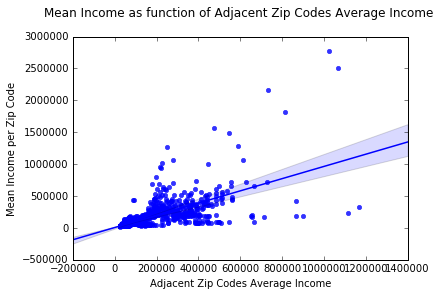

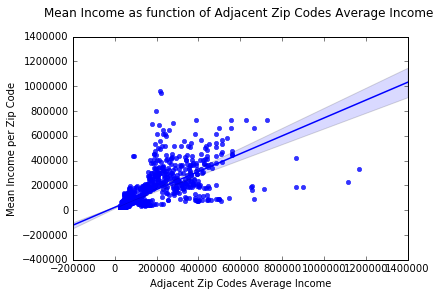

In [147]:
# 1. Adjacent zip code average income

# Including Income > $1M
g1 = sns.regplot(agg[X_list[0]], MeanIncome)
g1.set(title="Mean Income as function of Adjacent Zip Codes Average Income \n",
       xlabel='Adjacent Zip Codes Average Income', ylabel='Mean Income per Zip Code')
plt.show()

# Excluding Income > $1M
g11 = sns.regplot(agg2[X_list[0]], MeanIncome2)
g11.set(title="Mean Income as function of Adjacent Zip Codes Average Income \n",
       xlabel='Adjacent Zip Codes Average Income', ylabel='Mean Income per Zip Code')
plt.show()

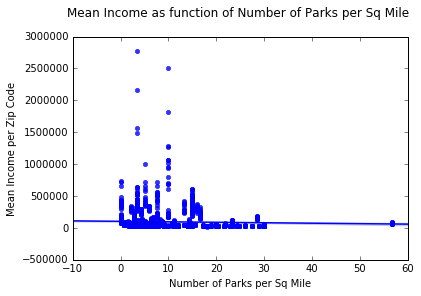

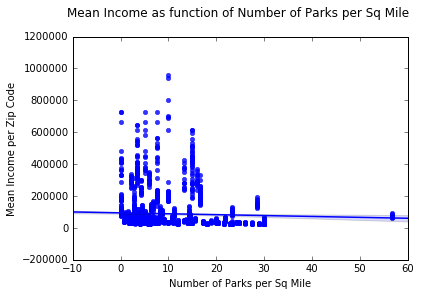

In [148]:
# 2. Number of parks

# Including Income > $1M
g2 = sns.regplot(agg[X_list[1]]/agg['LandSqMile'], MeanIncome)
g2.set(title="Mean Income as function of Number of Parks per Sq Mile \n",
       xlabel='Number of Parks per Sq Mile', ylabel='Mean Income per Zip Code')
plt.show()

# Excluding Income > $1M
g21 = sns.regplot(agg2[X_list[1]]/agg2['LandSqMile'], MeanIncome2)
g21.set(title="Mean Income as function of Number of Parks per Sq Mile \n",
       xlabel='Number of Parks per Sq Mile', ylabel='Mean Income per Zip Code')
plt.show()

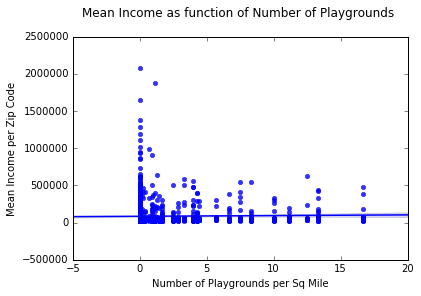

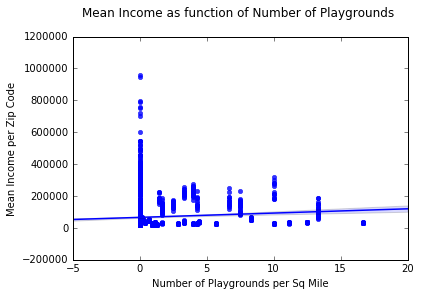

In [99]:
# 3. Number of playgrounds

# Including Income > $1M
g3 = sns.regplot(agg[X_list[2]]/agg['LandSqMile'], MeanIncome)
g3.set(title="Mean Income as function of Number of Playgrounds \n",
       xlabel='Number of Playgrounds per Sq Mile', ylabel='Mean Income per Zip Code')
plt.show()

# Excluding Income > $1M
g31 = sns.regplot(agg2[X_list[2]]/agg2['LandSqMile'], MeanIncome2)
g31.set(title="Mean Income as function of Number of Playgrounds \n",
       xlabel='Number of Playgrounds per Sq Mile', ylabel='Mean Income per Zip Code')
plt.show()

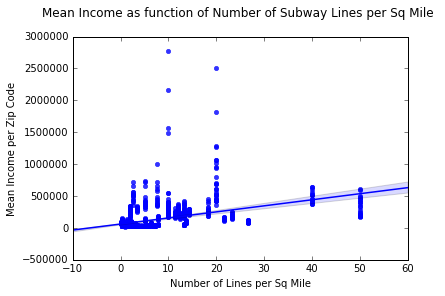

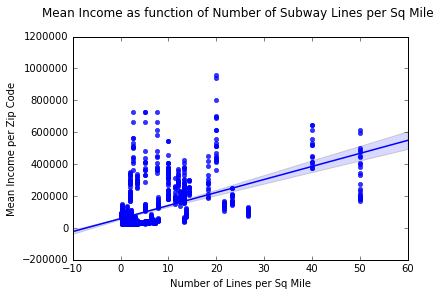

In [149]:
# 4. Number of subways

# Including Income > $1M
g4 = sns.regplot(agg[X_list[3]]/agg['LandSqMile'], MeanIncome)
g4.set(title="Mean Income as function of Number of Subway Lines per Sq Mile \n",
       xlabel='Number of Lines per Sq Mile', ylabel='Mean Income per Zip Code')
plt.show()

# Excluding Income > $1M
g41 = sns.regplot(agg2[X_list[3]]/agg2['LandSqMile'], MeanIncome2)
g41.set(title="Mean Income as function of Number of Subway Lines per Sq Mile \n",
       xlabel='Number of Lines per Sq Mile', ylabel='Mean Income per Zip Code')
plt.show()

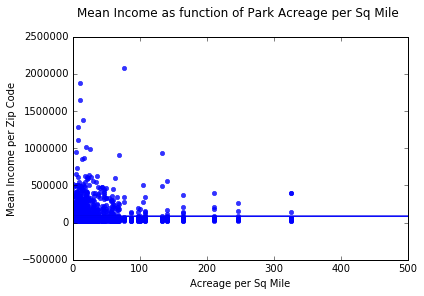

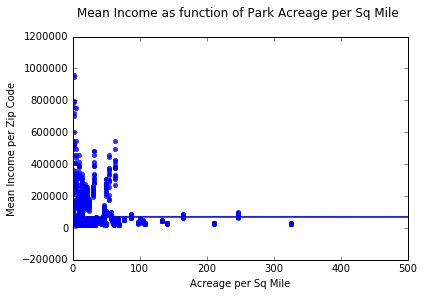

In [109]:
# 5. Park Acreage (use this or number of parks?)

# Including Income > $1M
g5 = sns.regplot(agg[X_list[4]]/agg['LandSqMile'], MeanIncome)
g5.set(title="Mean Income as function of Park Acreage per Sq Mile \n",
       xlabel='Acreage per Sq Mile', ylabel='Mean Income per Zip Code')
plt.xlim([0,500])  # to exclude one zip code with ~ 171,600 acres!
plt.show()

# Excluding Income > $1M
g51 = sns.regplot(agg2[X_list[4]]/agg2['LandSqMile'], MeanIncome2)
g51.set(title="Mean Income as function of Park Acreage per Sq Mile \n",
       xlabel='Acreage per Sq Mile', ylabel='Mean Income per Zip Code')
plt.xlim([0,500])  # to exclude one zip code with ~ 171,600 acres!
plt.show()

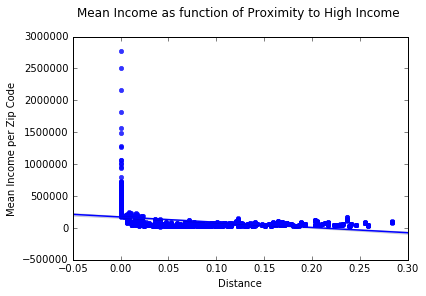

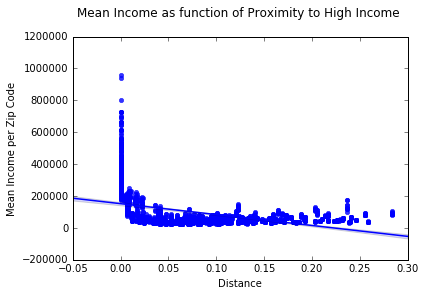

In [150]:
# 6. Proximity to 90th percentile income zip code area

# Including Income > $1M
g6 = sns.regplot(agg[X_list[5]], MeanIncome)
g6.set(title="Mean Income as function of Proximity to High Income \n",
       xlabel='Distance', ylabel='Mean Income per Zip Code')
plt.show()

# Excluding Income > $1M
g61 = sns.regplot(agg2[X_list[5]], MeanIncome2)
g61.set(title="Mean Income as function of Proximity to High Income \n",
       xlabel='Distance', ylabel='Mean Income per Zip Code')
plt.show()